In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pylab as plt
import glob
import os
from pprint import pprint
import scipy.integrate as inte
import scipy.special as special
import scipy.interpolate as interp
import scipy.signal as sig

In [3]:
import stephane.display.graphes as graphes
import stephane.tools.Smath as smath

import icewave.tools.datafolders as df
import icewave.tools.rw_data as rw_data

#import sympy #symoblic python
#import mpmath as math
#import cv2
import glob
import csv
import os

import icewave.phone.rw_pyphone as rw

macOS
laita.pmmh-local.espci.fr


In [88]:
date = '0223'
base = '/Volumes/Hublot24/Share_hublot/Data/'+date+'/'

savefolder = base+'Summary/Results/'
savefolder_local = '/Users/stephane/Documents/Articles/En_cours/BicWin2024/Summary/Results/'+date+'/'

if not os.path.exists(savefolder):
    os.makedirs(savefolder)
    #os.makedirs(savefolder_local)

In [6]:
import icewave.field.buoys as buoys
filename =  f'/Volumes/Hublot24/Share_hublot/Data/{date}/Summary/records_{date}.pkl'

records = rw_data.load_pkl(filename)
print(records.keys())
#buoys.read_buoy_data(filename)
#srtfiles_mesange = glob.glob(base+date+'/Drones/mesange/*/*.SRT')#/*/*.srt')
#srtfiles_bernache = glob.glob(base+date+'/Drones/Bernache/*/*.SRT')#/*/*.srt')
#pprint(srtfiles_mesange)

dict_keys(['drones', 'phones', 'geophones', 'buoys', 'gps'])


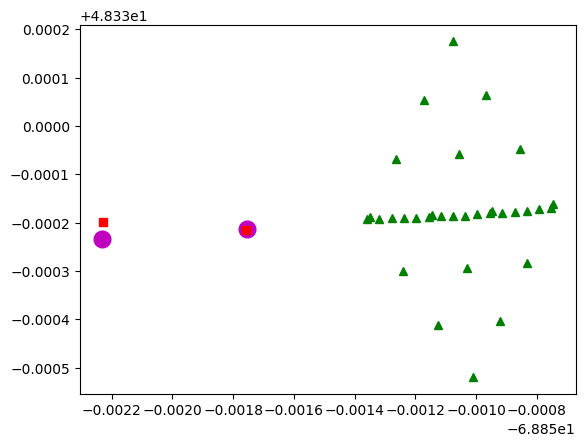

In [86]:
couples = [('B1','T17'),('B2','T6')]#,('B4','T0'),('B5','T0')]

for couple in couples:
    instrument = 'buoys'
    key = couple[0]
    k = list(records[instrument][key].keys())[0]
    lat = np.mean(records[instrument][key][k]['latitude'])
    lon = np.mean(records[instrument][key][k]['longitude'])
    plt.plot(lon,lat,'mo',markersize=12)

    instrument = 'phones'
    key = couple[1]
    k = 'Bic24_S02_2024_0223'
    lat = float(records[instrument][key][k]['latitude'])
    lon = float(records[instrument][key][k]['longitude'])
    plt.plot(lon,lat,'rs')

for key in records['geophones'].keys():
    for k in records['geophones'][key].keys():
        #.keys()
        lat = np.mean(records['geophones'][key][k]['latitude'])
        lon = np.mean(records['geophones'][key][k]['longitude'])
        #pprint(lat[0])
        plt.plot(lon,lat,'g^')

In [131]:
print(data_buoy['IMU'].keys())
print(data_buoy['IMU']['UTC_TIME'].keys())#.keys())#.keys())

<KeysViewHDF5 ['EKF_EULER', 'EKF_NAV', 'EKF_QUAT', 'GPS1_POS', 'GPS1_VEL', 'IMU_DATA', 'MAG', 'STATUS', 'UTC_TIME', 'file_name', 'mdir', 'mname']>
<KeysViewHDF5 ['CLOCK_STATUS', 'CRC', 'CRC_CALC', 'DAY', 'GPS_TOW', 'HOUR', 'MIN', 'MONTH', 'NANOSEC', 'SEC', 'TIME_STAMP', 'TS_fix', 'YEAR', 't', 'time']>


/Volumes/Hublot24/Share_hublot/Data/0223//boueeVague/B1/mat/buoy1_sbg_20240223_1700.mat
<KeysViewHDF5 ['ACCEL_X', 'ACCEL_Y', 'ACCEL_Z', 'CRC', 'CRC_CALC', 'DATA_VEL_X', 'DATA_VEL_Y', 'DATA_VEL_Z', 'DELTA_ANGLE_X', 'DELTA_ANGLE_Y', 'DELTA_ANGLE_Z', 'GYRO_X', 'GYRO_Y', 'GYRO_Z', 'IMU_STATUS', 'TEMP', 'TIME_STAMP', 'TS_fix', 't', 'time']>
[-9.795324 -9.794023 -9.795921 -9.797258 -9.79807  -9.798507 -9.800679
 -9.801028 -9.799738 -9.7985  ]
77732


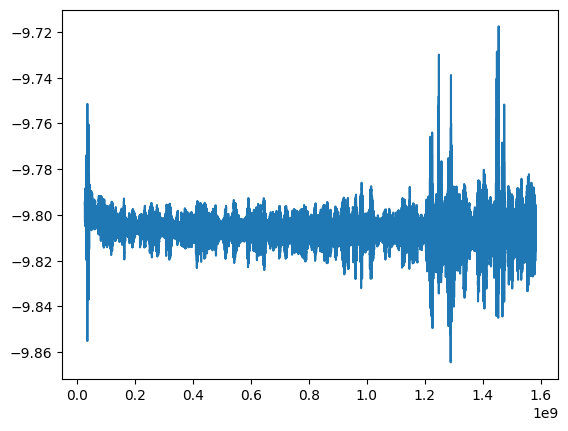

In [114]:
filename = base+'/boueeVague/B1/mat/buoy1_sbg_20240223_1700.mat'
data_buoy = buoys.read_buoy_data(filename)
print(data_buoy['IMU']['IMU_DATA'].keys())
t = np.asarray(data_buoy['IMU']['IMU_DATA']['TIME_STAMP'][0])
az = np.asarray(data_buoy['IMU']['IMU_DATA']['ACCEL_Z'][0])

#print(t[:10],az[:10])
print(az[:10])
i1 = 10**5
print(len(az))
plt.plot(t[:i1],az[:i1])
#srtfiles_mesange = glob.glob(base+date+'/Drones/mesange/*/*.SRT')#/*/*.srt')
#srtfiles_bernache = glob.glob(base+date+'/Drones/Bernache/*/*.SRT')#/*/*.srt')
#pprint(srtfiles_mesange)

In [ ]:
date = '2024_0223'
year,day = date.split('_')


base = '/Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/'
#base = '/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/'
#folder = base+'Data/'+year+'/'+day+'/T_00*'
folder = base +'000*'
#norme_folder = base + 'Nomenclature/'
#savefolder = base+'Data/'+year+'/'+day+'/Results'
savefolder = base + 'Results/'

if not os.path.exists(savefolder):
    os.makedirs(savefolder)
print(folder)
folderlist = glob.glob(folder)

for i,f in enumerate(folderlist):
    print(i,f)
#folder = os.path.dirname(filelist[0])


In [ ]:
import icewave.phone.load as load

print(folderlist[7])
data = load.loads(folderlist)

print(data.keys())

B1 -68.85175305691494
B1 -68.85175164443312
B2 -68.85223142278954
B2 -68.85222264121369
B4 -68.85255580714285
B4 -68.85255306682727
48.329783851803526


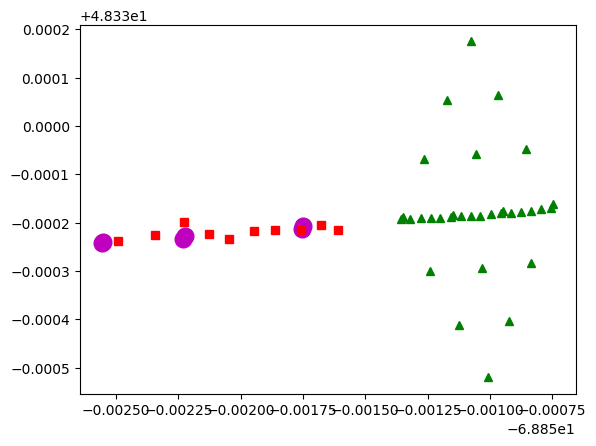

In [61]:

instrument = 'buoys'
for key in records[instrument].keys():
    if key=='B5':
        continue
    for k in records[instrument][key].keys():
        lat = np.mean(records[instrument][key][k]['latitude'])
        lon = np.mean(records[instrument][key][k]['longitude'])
        #pprint(lat[0])
        print(key,lon)

        plt.plot(lon,lat,'mo',markersize=12)


instrument = ['phones','buoys','geophones']

instrument = 'phones'
for key in records[instrument].keys():
    for k in records[instrument][key].keys():
        lat = float(records[instrument][key][k]['latitude'])
        lon = float(records[instrument][key][k]['longitude'])
        #pprint(lat[0])
        plt.plot(lon,lat,'rs')
        

#plt.plot(lon2,lat2,'rs')

print(lat)

for key in records['geophones'].keys():
    for k in records['geophones'][key].keys():
        #.keys()
        lat = np.mean(records['geophones'][key][k]['latitude'])
        lon = np.mean(records['geophones'][key][k]['longitude'])
        #pprint(lat[0])
        plt.plot(lon,lat,'g^')

#        pprint(records['geophones'][key][k]['time']) 


In [63]:
records['buoys']['B1'].keys()

dict_keys(['buoy1_sbg_20240223_1700', 'buoy1_sbg_20240223_1800'])

In [68]:
records['phones'].keys()

dict_keys(['T0', 'T4', 'T6', 'T9', 'T11', 'T13', 'T16', 'T17', 'T18', 'T19'])

In [81]:
records['buoys'].keys()

dict_keys(['B1', 'B2', 'B4', 'B5'])

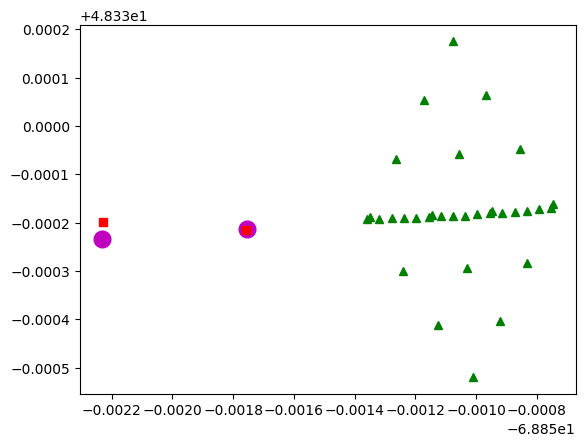